# 第2回 数理生物研究 $\times$ 計算機

# 力学系の数理解析と数値計算

## 線形安定性解析

### 変数宣言 & 方程式の定義

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# 変数，定数の宣言
sp.var('x,y,a,b,c,d')

# 関数f,gの定義
f = a*x - b*x*y
g = c*x*y - d*y

display(f)
display(g)

a*x - b*x*y

c*x*y - d*y

### $f=0,g=0$ の連立方程式を解いて平衡点を求める

In [2]:
eq1 = sp.Eq(f, 0)
eq2 = sp.Eq(g, 0)
equivs = sp.solve([eq1, eq2], [x,y])
display(equivs)

[(0, 0), (d/c, a/b)]

### ヤコビ行列を求める

In [3]:
# ヤコビ行列の各要素を求める
j11 = sp.diff(f, x)
j12 = sp.diff(f, y)
j21 = sp.diff(g, x)
j22 = sp.diff(g, y)

# 要素を並べて行列にする
J = sp.Matrix(([j11,j12],[j21,j22]))
display(J)

Matrix([
[a - b*y,    -b*x],
[    c*y, c*x - d]])

In [4]:
# 以下はよりスマートな方法．ただの参考なのでコメントアウトしてあります．
'''
# ヤコビ行列を生成
u = sp.Matrix((x, y))
f_taylor = sp.Matrix(sp.tensor.array.derive_by_array(f, u))  # f の一階微分
g_taylor = sp.Matrix(sp.tensor.array.derive_by_array(g, u))  # g の一階微分

# 一階微分を並べて行列にする
Jacob = f_taylor.col_insert(1,g_taylor)
display(Jacob)
'''
print()

In [5]:
u = sp.Matrix((x,y))

# 平衡点 (0,0) についての固有値
xy_equiv1 = list(zip(u,equivs[0]))
print(xy_equiv1)
display(J.subs(xy_equiv1))
ev1 = J.subs(xy_equiv1).eigenvals()
display(ev1)

[(x, 0), (y, 0)]


Matrix([
[a,  0],
[0, -d]])

{a: 1, -d: 1}

In [6]:
# 平衡点 (d/c, a/b) についての固有値
xy_equiv2 = list(zip(u,equivs[1]))
print(xy_equiv2)
display(J.subs(xy_equiv2))
ev2 = J.subs(xy_equiv2).eigenvals()
display(ev2)

[(x, d/c), (y, a/b)]


Matrix([
[    0, -b*d/c],
[a*c/b,      0]])

{-sqrt(-a*d): 1, sqrt(-a*d): 1}

## ベクトル場

### 平衡点まわりの解の挙動をプロット

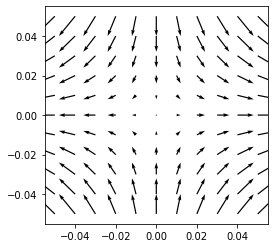

In [7]:
# 平衡点 (0,0) まわりの解の挙動
a_ = 1
b_ = 0.01
c_ = 0.02
d_ = 1

xo,yo = equivs[0]    # 平衡点
LX, LY = 0.05, 0.05  # 平衡点まわりの表示範囲（今回は±0.05の範囲を表示）
gridwidth = 0.01     # ベクトルを描画する間隔

x_array = np.arange(-LX+xo, LX+xo+0.001, gridwidth, dtype=float)
y_array = np.arange(-LY+yo, LY+yo+0.001, gridwidth, dtype=float)
X, Y= np.meshgrid(x_array, y_array)

# 解の挙動を算出
U = a_*X - b_*X*Y
V = c_*X*Y - d_*Y

# プロット
plt.figure(figsize=(4,4))
plt.quiver(X,Y,U,V,angles='xy',scale_units='xy', scale=5.0)
plt.savefig('vector1.eps')

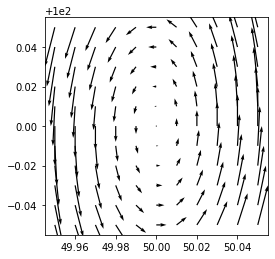

In [8]:
# 平衡点 (d/c, a/b) まわりの解の挙動
a_ = 1
b_ = 0.01
c_ = 0.02
d_ = 1

xo,yo = equivs[1]    # 平衡点
xo = xo.subs(list(zip([c,d], [c_,d_])))  # パラメータの値を代入
yo = yo.subs(list(zip([a,b], [a_,b_])))  # 同上

LX, LY = 0.05, 0.05  # 平衡点まわりの表示範囲（今回は±0.05の範囲を表示）
gridwidth = 0.01     # ベクトルを描画する間隔

x_array = np.arange(-LX+xo, LX+xo+0.001, gridwidth, dtype=float)
y_array = np.arange(-LY+yo, LY+yo+0.001,gridwidth, dtype=float)
X, Y= np.meshgrid(x_array,y_array)

# 解の挙動を算出
U = a_*X - b_*X*Y
V = c_*X*Y - d_*Y

# プロット
plt.figure(figsize=(4,4))
plt.quiver(X,Y,U,V,angles='xy',scale_units='xy', scale=5.0)
plt.savefig('vector2.eps')